# Linear Regression to estimate high-order epistasis

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from epistasis.models import EpistasisNonlinearRegression

# Define the nonlinear relationship and it's inverse.
def diminishing_returns(x, A):
    return 1.0 / (1 + A * np.exp(-x))  

def reverse_func(y, A):
    return -np.log(((1 / y) - 1)/A)

# Initialize the model
model = EpistasisNonlinearRegression.read_json("../data/nonlinear-epistasis-dataset.json",
    order=2,
    function=diminishing_returns,
    reverse=reverse_func,
    model_type="local",
)

# Fit the model.
model.fit(A=1)

EpistasisNonlinearRegression(function=<function diminishing_returns at 0x11623ee18>,
               model_type='local', order=2,
               reverse=<function reverse_func at 0x11624b048>)

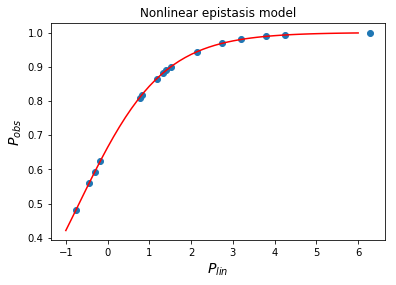

In [5]:
padd = model.Linear.predict(model.Linear.Xfit)
pobs = model.gpm.phenotypes
plt.plot(padd, pobs, "o")

xmodel = np.linspace(-1, 6)
ymodel = model.function(xmodel, model.parameters.A)

plt.plot(xmodel, ymodel, "-r")
plt.xlabel("$P_{lin}$", fontsize=14)
plt.ylabel("$P_{obs}$", fontsize=14)
plt.title("Nonlinear epistasis model")
plt.show()

In [6]:
from epistasis.plot import corr_resid_rhist, coefs

Plot the coefficients

In [7]:
coefs(model.epistasis.values, model.epistasis.sites, figsize=(2,3))

(<matplotlib.figure.Figure at 0x118c504e0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x118edd4e0>])

See dataframe

In [8]:
model.epistasis.df

sites    values  stdeviations
0      0 -0.754271           NaN
1      1  0.316071           NaN
2      2  1.572561           NaN
3      3  0.574900           NaN
4      4  0.442576           NaN
5    1,2  0.387853           NaN
6    1,3  0.631311           NaN
7    1,4  1.169253           NaN
8    2,3  0.017155           NaN
9    2,4  0.056421           NaN
10   3,4  1.874228           NaN

Write dataframe

In [10]:
model.epistasis.df.to_csv("coefs.csv")